In [57]:
import sympy as syms
import numpy as np
import math
import matplotlib.pyplot as plt

from sympy import * # For basic mathematical operations
syms.init_printing()
from sympy import symbols
from sympy import Matrix
from sympy.matrices import eye, zeros, ones, Identity # Special matrices (eye creates explicit matrix, Identity creates matrix expression)
from sympy import latex
from sympy import solve
from sympy import trigsimp # For simplifying trigonometric identities
from sympy.simplify.fu import fu # For simplifying trigonometric identities (Hongguang Fu's Trigonometric Simplification)
from sympy import Function # For expressing functions of time
from sympy import expand, factor # For expanding/factoring expressions
from sympy import Eq # For writing equations


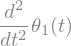

In [103]:
m1, m2,g, l1, l2, t = symbols('m_1,m_2,g,L_1,L_2, t')
q1 = Function('theta_1')
q1 = q1(t)
q2 = Function('theta_2')
q2 = q2(t)
q1_d = diff(q1,t)
q2_d = diff(q2,t)
q1_dd = diff(q1_d,t)
q2_dd = diff(q2_d,t)
q1_dd

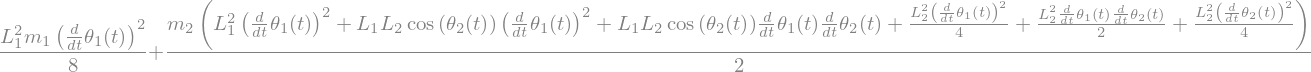

In [104]:
# Linear Kinetic Energy
xc1 = (1/2)*l1*cos(q1)
yc1 = (1/2)*l1*sin(q1)
xc1_d = diff(xc1,t)
yc1_d = diff(yc1,t)
xc2 = l1*cos(q1) + (1/2)*l2*cos(q1 + q2)
yc2 = l1*sin(q1) + (1/2)*l2*sin(q1 + q2)
xc2_d = diff(xc2,t)
yc2_d = diff(yc2,t)
ke_lin = nsimplify(trigsimp((1/2)*m1*(xc1_d**2 + yc1_d**2) + (1/2)*m2*(xc2_d**2 + yc2_d**2)))
ke_lin

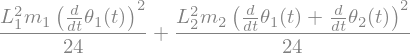

In [105]:
# Rotational Kinetic Energy
Ic1 = (1/12)*m1*l1**2
Ic2 = (1/12)*m2*l2**2
omega_1 = q1_d
omega_2 = q1_d + q2_d
ke_rot = nsimplify(trigsimp((1/2)*Ic1*omega_1**2 + (1/2)*Ic2*omega_2**2)) 
ke_rot

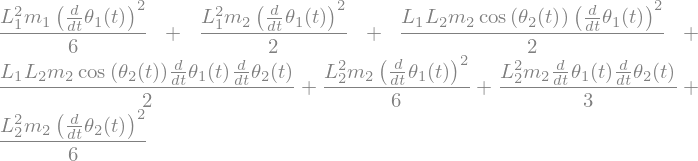

In [106]:
# Totol Kinetic Energy
ke_sys = ke_rot + ke_lin
ke_sys = nsimplify(trigsimp(ke_sys))
ke_sys

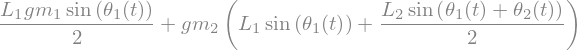

In [107]:
# Potential Energy
pe_sys = nsimplify(trigsimp(m1*g*(l1/2)*sin(q1) + m2*g*(l1*sin(q1) + (1/2)*l2*sin(q1 + q2))))
pe_sys

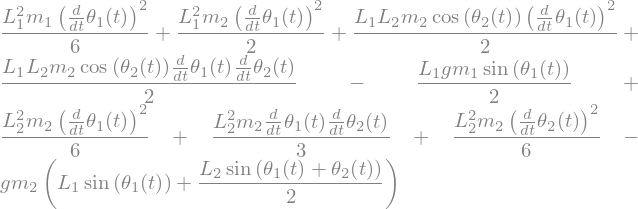

In [108]:
# Lagrangian
L = nsimplify(trigsimp(ke_sys - pe_sys))
L

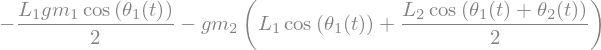

In [120]:
# Minimal Coordinates
q = Matrix([[q1],[q2]])
qd = Matrix([[q1_d],[q1_d]])
qdd = Matrix([[q1_dd],[q2_dd]])

dL_dq = nsimplify(Matrix([[diff(L,q1)],[diff(L,q2)]]))
dL_dq_d = Matrix([[diff(L,q1_d)],[diff(L,q2_d)]])
dL_dq_d_dt = nsimplify(Matrix([[diff(diff(L,q1_d),t)],[diff(diff(L,q2_d),t)]]))
dL_dq[0]

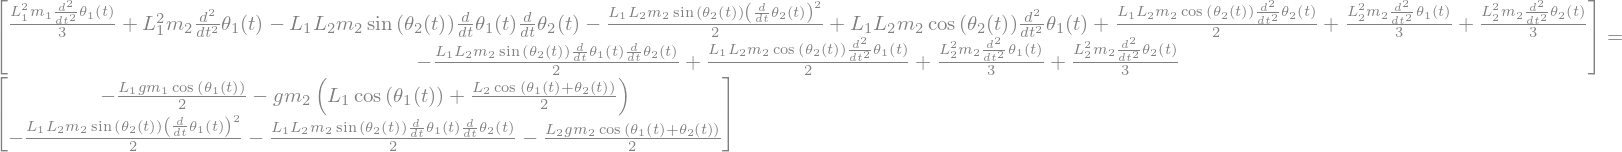

In [118]:
# EOM (Minimal Coordinates)
eom = Eq(dL_dq_d_dt, dL_dq)
eom

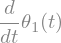